# **Classification**

## Imports

In [8]:
import warnings

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split

from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

import numpy as np


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('illinois-home-prices.csv')

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Random Forest Classifier

In [3]:
df['expensive'] = 0
df.loc[df['average_home_price'] > (df['average_home_price'].mean() + df['average_home_price'].std()), 'expensive'] = 1

features_matrix = df[['pct_college_education', 'unemployment_rate', 'median_household_income']]
target_array = df[['expensive']]

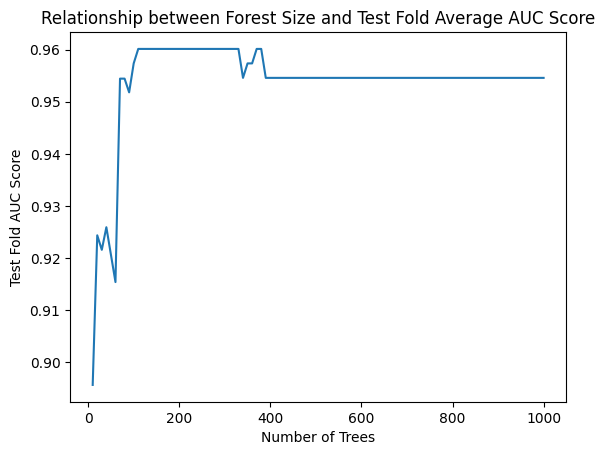

In [4]:
skf = StratifiedKFold(n_splits = 5,
           shuffle = True,
           random_state = 0,
           )

data = []

for i in np.arange(10, 1010, 10):

    rfc = RandomForestClassifier(n_estimators = i,
                                random_state = 0
                                )
    
    cv_scores = cross_val_score(rfc,
                           features_matrix,
                           target_array,
                           cv = skf,
                           scoring = 'roc_auc'
                           )
    
    data.append([i, cv_scores.mean()])

results_rfc = pd.DataFrame(data, columns = ['Forest Size', 'Test Fold Average AUC Score'])

plt.plot(results_rfc['Forest Size'].values, results_rfc['Test Fold Average AUC Score'].values)
plt.xlabel('Number of Trees')
plt.ylabel('Test Fold AUC Score')
plt.title('Relationship between Forest Size and Test Fold Average AUC Score')
plt.show()

In [5]:
optimal_forest_size = results_rfc.loc[results_rfc['Test Fold Average AUC Score'].idxmax()]['Forest Size']

print('Optimal Forest Size: ', optimal_forest_size)

Optimal Forest Size:  110.0


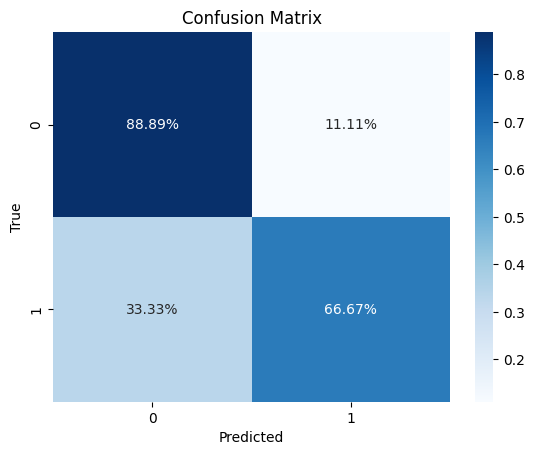

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_matrix,
                                                    target_array,
                                                    test_size = 0.2,
                                                    random_state = 42
                                                    )

rfc = RandomForestClassifier(n_estimators = 110,
                             random_state = 0
                             )
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot = True, fmt = '.2%', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()